In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
overweight = (df['weight'] / ((df['height'] / 100)**2) > 25).astype(int)
df['overweight'] = overweight
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [5]:
df["cholesterol"] = np.where((df["cholesterol"] == 1), 0, 1 )
df["gluc"] = np.where((df["gluc"] == 1), 0, 1)
df["gluc"]

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int64

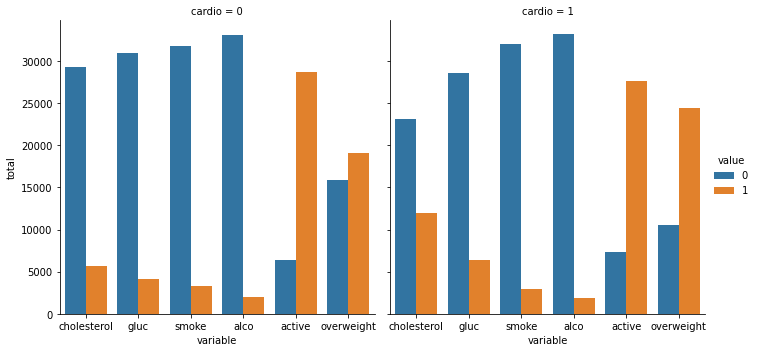

In [11]:
# Draw Categorical Plot
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc","smoke","alco","active","overweight"])


# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
#df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable','value'])['value'].count()).rename(columns={'value': 'total'}).reset_index()
# Draw the catplot with 'sns.catplot()'

figure = sns.catplot(x= "variable", kind ="count" ,hue = "value", data = df_cat, col= "cardio")

figure.set_axis_labels("variable", "total")

fig = figure.fig



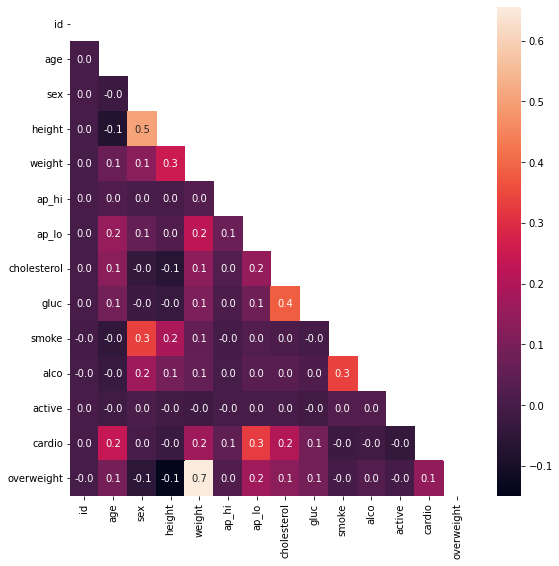

In [7]:
# Draw Heat Map
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025))

& (df['height'] <= df['height'].quantile(0.975) )
    
& (df['weight'] >= df['weight'].quantile(0.025))
    
& (df['weight'] <= df['weight'].quantile(0.975) ) ]

# Calculate the correlation matrix
corr = df_heat.corr( )
  
# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (9,9))
  
ax = sns.heatmap(corr, fmt=".1f",  annot=True, mask=mask)

plt.show()